In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import importlib

from faisst_denstream.DenStream import DenStream
from random import randint
from sys import stderr
from sklearn.datasets import make_moons
from loguru import logger
from sys import stdout

In [2]:
logger.remove()
logger.add(stdout, level="INFO")

1

{'beta': 0.2, 'epsilon': 4, 'lamb': 0.01, 'mu': 10, 'n_init_points': 2500, 'radius_multiplier': 2, 'stream_speed': 1}
2026-01-09 17:36:17.699 | INFO     | faisst_denstream.DenStream:_generate_clusters:410 - Clustering Request:
	outlier-micro-clusters:   0
	potential-micro-clusters: 13
	clusters:                 3


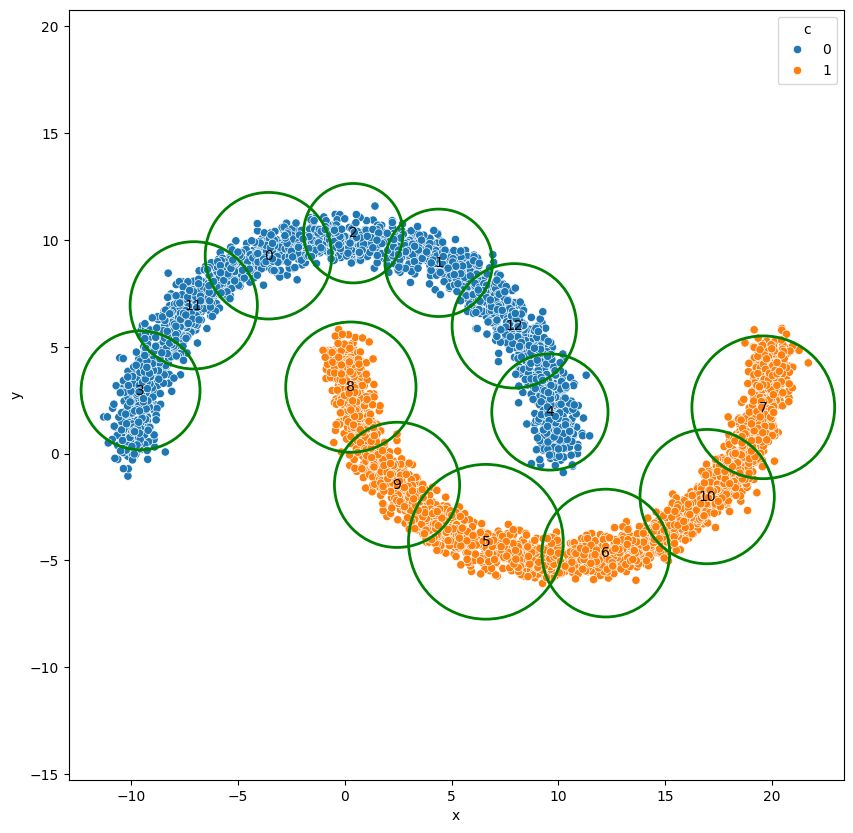

In [3]:
# Create data
test_dataset_size = 5000
data, _ = make_moons(n_samples=test_dataset_size, noise=0.05)
data *= 10
#data = np.vstack([np.random.normal(randint(0, 10), randint(1, 2), size=(test_dataset_size, 2)) for _ in range(3)])
np.random.shuffle(data)

# Create model
lamb = 0.01
beta = 0.2
mu = 10
epsilon = 4
n_init_points = int(test_dataset_size * 0.5)
stream_speed = 1
radius_multiplier = 2

model = DenStream(lamb, mu, beta, epsilon, n_init_points, stream_speed, radius_multiplier=radius_multiplier)
print(model.get_params())

# Train model
preds = model.fit_predict(data)

# Plot results and micro clusters
points = []
clusters = []
for point, pred in zip(data, preds):
    points.append(point)
    clusters.append(pred)

out = pd.DataFrame(data=points, columns=['x', 'y'])
out['c'] = clusters

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=out, x='x', y='y', hue='c', palette='tab10')

for i, pmc in enumerate(model.pmc):
    ax.text(pmc.center[0], pmc.center[1], str(i), ha='center', va='center', color='black')
    ax.add_patch(plt.Circle(pmc.center, pmc.radius, color='green', fill=False, lw=2))

for i, omc in enumerate(model.omc):
    ax.text(omc.center[0], omc.center[1], str(i), ha='center', va='center', color='black')
    ax.add_patch(plt.Circle(omc.center, omc.radius, color='red', fill=False, lw=2))

ax.set_aspect('equal', adjustable='datalim')

plt.show()